Importing Libraries and frames

In [ ]:
! pip install tokenizers scikit-learn

from tokenizers import Tokenizer
from tokenizers.normalizers import StripAccents, Lowercase, Sequence
from tokenizers.pre_tokenizers import Whitespace
from tokenizers.trainers import BpeTrainer, UnigramTrainer
from tokenizers.models import BPE, Unigram

from collections import Counter
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
pip install hazm

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 892.6/892.6 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 17.9 MB/s eta 0:00:00
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9298 sha256=212c0ac40c059c16b3d722fd006253c8671064aa2e4ce75027ba6aa7384b6da9
  Stored in directory: /root/.cache/pip/wheels/bc/be/39/c37ad168eb2ff644c9685f52554440372129450f0b8ed203dd
Successfully built flashtext
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviou

In [ ]:
import tokenizers

# Deliverable 3

# Part A.1

## Persian

In [ ]:
normaliser = Sequence([StripAccents(), Lowercase()])

Persian has multi word expressions, so we do not apply a Whitespace pre-tokeniser (for capture word-level morphology).

In [ ]:
# pre_tokeniser = Whitespace()

Initialising the BPE tokenizer.

In [ ]:
persian_tokenizer = Tokenizer(BPE())
persian_tokenizer.normalizer = normaliser
# persian_tokenizer.pre_tokenizer = pre_tokeniser

Keeping the default settings for the BpeTrainer and adding the recommended special tokens.

In [ ]:
trainer = BpeTrainer(special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"], vocab_size=30000)

Adding the path to the corpus as a string and training the tokenizer on it.

In [ ]:
!wget https://downloads.wortschatz-leipzig.de/corpora/fas_news_2020_100K.tar.gz
!tar --gunzip --extract --verbose --file=fas_news_2020_100K.tar.gz
persian_text_path = "/content/fas_news_2020_100K/fas_news_2020_100K-sentences.txt"

--2024-11-20 13:52:46--  https://downloads.wortschatz-leipzig.de/corpora/fas_news_2020_100K.tar.gz
Resolving downloads.wortschatz-leipzig.de (downloads.wortschatz-leipzig.de)... 139.18.2.68
Connecting to downloads.wortschatz-leipzig.de (downloads.wortschatz-leipzig.de)|139.18.2.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31227186 (30M) [application/x-gzip]
Saving to: ‘fas_news_2020_100K.tar.gz’

fas_news_2020_100K. 100%[===================>]  29.78M  16.0MB/s    in 1.9s    

2024-11-20 13:52:48 (16.0 MB/s) - ‘fas_news_2020_100K.tar.gz’ saved [31227186/31227186]

fas_news_2020_100K/
fas_news_2020_100K/fas_news_2020_100K-inv_w.txt
fas_news_2020_100K/fas_news_2020_100K-sources.txt
fas_news_2020_100K/fas_news_2020_100K-co_n.txt
fas_news_2020_100K/fas_news_2020_100K-import.sql
fas_news_2020_100K/fas_news_2020_100K-sentences.txt
fas_news_2020_100K/fas_news_2020_100K-co_s.txt
fas_news_2020_100K/fas_news_2020_100K-words.txt
fas_news_2020_100K/fas_news_2020_100K

In [ ]:
with open(persian_text_path, "r") as f:
    train_corpus, test_corpus = train_test_split(f.readlines(), test_size=0.2)

In [ ]:
persian_tokenizer.train_from_iterator(train_corpus, trainer=trainer)

Some sentences from the dataset

In [ ]:
print("3", persian_tokenizer.encode("۰۱ درصد سهم سبد سوخت کشور کرده است که با توجه به تولید فعلی سالانه ۱۷ میلیون تن LPG و شرایط تحریم و عدم صادرات کامل تولید مازاد بر مصرف، چارهای جز مصرف LPG در خودرو و مصرف در پتروشیمیهای PDH نیست.").tokens)
print("4", persian_tokenizer.encode("پرس غذا برگزار خواهد گردید که با توجه به شرایط کرونایی کشور همه این غذاها در سطح شهر و مناطق محروم توزیع خواهد گردید.").tokens)
print("5", persian_tokenizer.encode("۰۱) مجاز بوده و بخشنامه جدید جایگزین بخشنامه های متناظر قبلی کارمزدهای خدمات بانکی ریالی و الکترونیکی می شود.").tokens)

3 ['۰', '۱ درصد ', 'سهم ', 'سبد ', 'سوخت ', 'کشور ', 'کرده است که ', 'با توجه به ', 'تولید ', 'فعلی ', 'سالانه ', '۱۷ ', 'میلیون تن ', 'l', 'p', 'g', ' و ', 'شرایط ', 'تحریم و ', 'عدم ', 'صادرات ', 'کامل ', 'تولید ', 'مازاد ', 'بر ', 'مصرف', '، ', 'چارهای جز ', 'مصرف ', 'l', 'p', 'g ', 'در ', 'خودرو و ', 'مصرف ', 'در ', 'پتروشی', 'میهای ', 'p', 'd', 'h ', 'نیست', '.']
4 ['پرس ', 'غذا ', 'برگزار ', 'خواهد ', 'گر', 'دید که ', 'با توجه به شرایط ', 'کرونایی ', 'کشور ', 'همه این ', 'غذ', 'اها در ', 'سطح ', 'شهر و ', 'مناطق محروم ', 'توزیع ', 'خواهد ', 'گر', 'دید', '.']
5 ['۰', '۱) ', 'مجاز ', 'بوده و ', 'بخشنامه ', 'جدید ', 'جایگزین ', 'بخشنامه ', 'های ', 'مت', 'ناظر ', 'قبلی ', 'کار', 'مز', 'دهای ', 'خدمات ', 'بانکی ', 'ری', 'الی و ', 'الکترونیکی ', 'می شو', 'د', '.']


Some other sentences

In [ ]:
print("1", persian_tokenizer.encode("خیلی دوستت دارم.").tokens)
print("2", persian_tokenizer.encode("من از خواندن کتاب‌های شعر لذت می‌برم.").tokens)
print("3", persian_tokenizer.encode("این متن خیلی خواناست.").tokens)
print("4", persian_tokenizer.encode("او خیلی بی‌ادبانه صحبت کرد.").tokens)
print("5", persian_tokenizer.encode("هر روز به دانشگاه می‌روم.").tokens)
print("6", persian_tokenizer.encode("آیا می‌روی بازار؟").tokens)
print("7", persian_tokenizer.encode("او همیشه زود می‌رود.").tokens)
print("8", persian_tokenizer.encode("فردا این نامه را خواهم نوشت.").tokens)
print("9", persian_tokenizer.encode("در آن روستا خانک‌های زیبایی وجود دارد.").tokens)
print("10", persian_tokenizer.encode("باغبان در حال آب‌آوردن به باغ است.").tokens)

1 ['خیلی ', 'دوست', 'ت ', 'دار', 'م', '.']
2 ['من از ', 'خواندن ', 'کتابهای ', 'شعر ', 'لذت ', 'میبر', 'م', '.']
3 ['این ', 'متن ', 'خیلی ', 'خوان', 'است', '.']
4 ['او ', 'خیلی ', 'بی', 'اد', 'بانه ', 'صحبت ', 'کرد', '.']
5 ['هر روز ', 'به ', 'دانشگاه ', 'میرو', 'م', '.']
6 ['آیا ', 'می', 'روی ', 'بازار', '؟']
7 ['او ', 'همیشه ', 'زود ', 'میرو', 'د', '.']
8 ['فردا ', 'این نامه ', 'را ', 'خواهم ', 'نوشت', '.']
9 ['در آن ', 'روستا ', 'خان', 'کهای ', 'زیبایی ', 'وجود ', 'دارد', '.']
10 ['باغ', 'بان ', 'در حال ', 'آب', 'آوردن ', 'به ', 'باغ ', 'است', '.']


## Spanish

In [ ]:
regex_clean = r"[^0-9a-zA-Z\sáéíóúüñ]"
remove_unwanted_letters = tokenizers.normalizers.Replace(regex_clean,"")
# Remove the Language sign. As this seems to be also collected from wikipedia
# remove_language_sign = tokenizers.normalizers.Replace("채","")

In [ ]:
normaliser = Sequence([StripAccents(), Lowercase(),remove_unwanted_letters])

In [ ]:
pre_tokeniser = Whitespace()

In [ ]:
spanish_tokenizer = Tokenizer(BPE())
spanish_tokenizer.normalizer = normaliser
spanish_tokenizer.pre_tokenizer = pre_tokeniser

In [ ]:
trainer = BpeTrainer(special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"], vocab_size=30000)

In [ ]:
!wget https://downloads.wortschatz-leipzig.de/corpora/spa_wikipedia_2021_30K.tar.gz

--2024-11-19 16:36:10--  https://downloads.wortschatz-leipzig.de/corpora/spa_wikipedia_2021_30K.tar.gz
Resolving downloads.wortschatz-leipzig.de (downloads.wortschatz-leipzig.de)... 139.18.2.68
Connecting to downloads.wortschatz-leipzig.de (downloads.wortschatz-leipzig.de)|139.18.2.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7349889 (7.0M) [application/x-gzip]
Saving to: ‘spa_wikipedia_2021_30K.tar.gz’

spa_wikipedia_2021_ 100%[===================>]   7.01M  6.16MB/s    in 1.1s    

2024-11-19 16:36:12 (6.16 MB/s) - ‘spa_wikipedia_2021_30K.tar.gz’ saved [7349889/7349889]



In [ ]:
!tar --gunzip --extract --verbose --file=spa_wikipedia_2021_30K.tar.gz

spa_wikipedia_2021_30K/
spa_wikipedia_2021_30K/spa_wikipedia_2021_30K-sentences.txt
spa_wikipedia_2021_30K/spa_wikipedia_2021_30K-words.txt
spa_wikipedia_2021_30K/spa_wikipedia_2021_30K-sources.txt
spa_wikipedia_2021_30K/spa_wikipedia_2021_30K-inv_so.txt
spa_wikipedia_2021_30K/spa_wikipedia_2021_30K-co_n.txt
spa_wikipedia_2021_30K/spa_wikipedia_2021_30K-import.sql
spa_wikipedia_2021_30K/spa_wikipedia_2021_30K-inv_w.txt
spa_wikipedia_2021_30K/spa_wikipedia_2021_30K-co_s.txt


In [ ]:
def get_lines_without_number(file_name):
    with open(file_name, "r") as f:
        final_L = []
        #Remove the line numbers bevor the tab
        for lin in f.readlines():
            split_lin = lin.split("\t")
            final_L.append(split_lin[1])
        return final_L
spanish_text_path = "/content/spa_wikipedia_2021_30K/spa_wikipedia_2021_30K-sentences.txt"

final_L = get_lines_without_number(spanish_text_path)
train_corpus, test_corpus = train_test_split(final_L, test_size=0.2)

In [ ]:
spanish_tokenizer.train_from_iterator(train_corpus, trainer=trainer)

In [ ]:
print("1", spanish_tokenizer.encode(" Abanico con varillaje de nácar y oro, adornado con cuentas y caracoles.").tokens)
print("2", spanish_tokenizer.encode("A Banks le llamó la atención la influencia que parecía tener Torava en toda aquella región.").tokens)
print("3", spanish_tokenizer.encode("Abarca desde una pequeña fisura hasta la rotura total del hueso con desplazamiento de los dos extremos de la fractura del hueso.").tokens)

1 ['abanico', 'con', 'varilla', 'je', 'de', 'ná', 'car', 'y', 'oro', ',', 'adornado', 'con', 'cuentas', 'y', 'cara', 'coles', '.']
2 ['a', 'banks', 'le', 'llamó', 'la', 'atención', 'la', 'influencia', 'que', 'parecía', 'tener', 'tora', 'va', 'en', 'toda', 'aquella', 'región', '.']
3 ['abarca', 'desde', 'una', 'pequeña', 'fi', 'sura', 'hasta', 'la', 'rotura', 'total', 'del', 'hueso', 'con', 'desplazamiento', 'de', 'los', 'dos', 'extremos', 'de', 'la', 'fractura', 'del', 'hueso', '.']


## Part A.2

In [ ]:
train_word_counts = Counter()
for sentence in train_corpus:
    words = sentence.split()
    train_word_counts.update(words)

In [ ]:
def classify_word_frequency(word, frequency_threshold=2):
    if word not in train_word_counts:
        return "unseen"
    elif train_word_counts[word] >= frequency_threshold:
        return "frequent"
    else:
        return "infrequent"

In [ ]:
test_word_classes = {}
for sentence in test_corpus:
    words = sentence.split()
    for word in words:
        test_word_classes[word] = classify_word_frequency(word)

In [ ]:
def analyze_word_classes(tokenizer, word_classes):
    frequent_token_lengths = []
    infrequent_token_lengths = []
    unseen_token_lengths = []

    for word, word_class in word_classes.items():
        encoding = tokenizer.encode(word)
        tokens = encoding.tokens

        if word_class == "frequent":
            frequent_token_lengths.append(len(tokens))
        elif word_class == "infrequent":
            infrequent_token_lengths.append(len(tokens))
        elif word_class == "unseen":
            unseen_token_lengths.append(len(tokens))

    return {
        "frequent_avg_tokens": np.mean(frequent_token_lengths) if frequent_token_lengths else 0,
        "infrequent_avg_tokens": np.mean(infrequent_token_lengths) if infrequent_token_lengths else 0,
        "unseen_avg_tokens": np.mean(unseen_token_lengths) if unseen_token_lengths else 0
    }

## Persian

In [ ]:
persian_word_class_analysis = analyze_word_classes(persian_tokenizer, test_word_classes)
persian_word_class_analysis

{'frequent_avg_tokens': 2.2555667793930345,
 'infrequent_avg_tokens': 2.724944320712695,
 'unseen_avg_tokens': 2.6368905448871054}

In [ ]:
def analyze_tokenizer(tokenizer, corpus):
    token_lengths = []
    tokens_per_word = []
    token_frequencies = Counter()
    sentences = 0

    for sentence in corpus:
        encoding = tokenizer.encode(sentence)
        tokens = encoding.tokens
        token_lengths.extend([len(token) for token in tokens])
        tokens_per_word.append(len(tokens) / len(sentence.split()))
        token_frequencies.update(tokens)
        sentences = sentences + 1

    avg_token_length = np.mean(token_lengths)
    avg_tokens_per_word = np.mean(tokens_per_word)

    return avg_token_length, avg_tokens_per_word, token_frequencies

with open(persian_text_path) as corpus:
    persian_stats_corpus = analyze_tokenizer(persian_tokenizer, corpus)

## Spanish

In [ ]:
spanish_word_class_analysis = analyze_word_classes(spanish_tokenizer, test_word_classes)
spanish_word_class_analysis

{'frequent_avg_tokens': 0.1021420419629532,
 'infrequent_avg_tokens': 0.241402263146217,
 'unseen_avg_tokens': 1.7701713048462078}

In [ ]:
spanish_stats_corpus = analyze_tokenizer(spanish_tokenizer, get_lines_without_number(spanish_text_path))

## Part B

## Persian B1-1

### Collecting statistics of key concepts:
- Mean of tokens length
- Mean of tokens per word

In [ ]:
def print_tokenization_stats(stats):
    print(f"Mean Token Length: {stats[0]:.2f}")
    print(f"Mean Tokens per Word: {stats[1]:.2f}")

print_tokenization_stats(persian_stats_corpus)

Mean Token Length: 5.76
Mean Tokens per Word: 0.94


## Spanish B1-1

In [ ]:
def print_tokenization_stats(stats):
    print(f"Mean Token Length: {stats[0]:.2f}")
    print(f"Mean Tokens per Word: {stats[1]:.2f}")
    print()

print_tokenization_stats(spanish_stats_corpus)

Mean Token Length: 4.10
Mean Tokens per Word: 1.24



#Persian B1-2

- Number of total sentences
- Number of total words
- Unique words
- Average words per sentence
- Average characters per sentence

In [ ]:
# Only Count words
total_counter = Counter()
char_len = 0
words_len = 0
counter = 0
for sentence in train_corpus:

    words = sentence.split()
    #print(len(words))
    char_len += len(sentence)
    words_len += len(words)
    counter +=1
    total_counter.update(words)

for sentence in test_corpus:
    words = sentence.split()
    counter +=1
    char_len += len(sentence)
    words_len += len(words)
    total_counter.update(words)

avg_char = char_len/counter
avg_words = words_len/counter
print("Total Sentences:",counter)
print("Total Words:", words_len,"\nUnique words:",len(train_word_counts))
print("Average Words per Sentence:", avg_words,"\nAverage Chars per Sentence:",avg_char)

Total Sentences: 100000
Total Words: 2484412 
Unique words: 165300
Average Words per Sentence: 24.84412 
Average Chars per Sentence: 128.53517


In [ ]:
from src.helper import get_average_word_length
from src.helper import get_lines_without_number
from src.helper import clean_persian_text
persian_text_path = "fas_news_2020_100K/fas_news_2020_100K-sentences.txt"
text = get_lines_without_number(persian_text_path)
whole_text = clean_persian_text(text)
avg_word_length = get_average_word_length(whole_text)
print(f"Average word length in Char: {avg_word_length:0.4f} ")

Average word length in Char: 4.0437 


## Spanish B1-2

In [ ]:
total_counter = Counter()
char_len = 0
words_len = 0
counter = 0
for sentence in train_corpus:

    words = sentence.split()
    char_len += len(sentence)
    words_len += len(words)
    counter +=1
    total_counter.update(words)
for sentence in test_corpus:
    words = sentence.split()
    counter +=1
    char_len += len(sentence)
    words_len += len(words)
    total_counter.update(words)

avg_char = char_len/counter
avg_words = words_len/counter
print("Total sentences: ",counter)
print("Total words: ", words_len,"unique words: ",len(train_word_counts))
print("Average words per Sentence: ", avg_words," Average chars per Sentence: ",avg_char)

Total sentences:  30000
Total words:  623694 unique words:  165295
Average words per Sentence:  20.7898  Average chars per Sentence:  125.19466666666666


In [ ]:
from src.helper import clean_spanish_text
## Load the Spanish text
spanish_text_path = "spa_wikipedia_2021_30K-sentences.txt"
final_L = get_lines_without_number(spanish_text_path)
#Get the data as lines
# Already cleaned from starting numbers
whole_text = get_lines_without_number(spanish_text_path)
#Use the cleaning regex
whole_text = clean_spanish_text(whole_text)
avg_word_length = get_average_word_length(whole_text)
print(f"Average word length in Char: {avg_word_length:0.4f} ")

Average word length in Char: 4.9419 


## Persian B1-3

- Total Number of Hapax Legomena

In [ ]:
avg_token_length, avg_tokens_per_word, token_frequencies = persian_stats_corpus
hapax_count = 0
for token in token_frequencies:
    if token_frequencies[token] == 1:
        hapax_count +=1
print("Total Number of Hapax Legomena:",hapax_count)

Total Number of Hapax Legomena: 152


## Spanish B1-3

In [ ]:
avg_token_length, avg_tokens_per_word, token_frequencies = spanish_stats_corpus
hapax_count = 0
for token in token_frequencies:
    if token_frequencies[token] == 1:
        hapax_count +=1
print("Total Number of hapax legomena: ",hapax_count)

Total Number of hapax legomena:  954


## Persian B1-4

- Most frequent bigrams, trigrams, quadgrams

In [ ]:
import re
from hazm import word_tokenize
from nltk import ngrams
from collections import Counter

stopwords = [
    'به', 'از', 'را', 'و', 'برای', 'این', 'که', 'با', 'در', 'چون', 'اگر', 'ها', 'نه', 'اینکه', 'یا', 'هم', 'تا', 'که', 'آن', 'باید', 'شده', 'چرا', 'همچنین', 'کردن', 'شد'
]

def clean_persian_text(text):
    cleaned_text = re.sub(r'[^ا-ی0-9\s]+', '', text)
    return cleaned_text

text = open(persian_text_path, encoding='utf-8').read()
cleaned_text = clean_persian_text(text)
tokens = word_tokenize(cleaned_text)
tokens_without_stopwords = [word for word in tokens if word not in stopwords]
bigram_list = list(ngrams(tokens_without_stopwords, 2))
bigram_counts = Counter(bigram_list)
most_common_bigrams = bigram_counts.most_common(10)
print("Most common bigrams:")
for bigram, count in most_common_bigrams:
    print(f"{bigram}: {count}")


trigram_list = list(ngrams(tokens_without_stopwords, 3))
trigram_counts = Counter(trigram_list)
most_common_trigrams = trigram_counts.most_common(10)
print("\nMost common trigrams:")
for trigram, count in most_common_trigrams:
    print(f"{trigram}: {count}")


quadgram_list = list(ngrams(tokens_without_stopwords, 4))
quadgram_counts = Counter(quadgram_list)
most_common_quadgrams = quadgram_counts.most_common(10)
print("\nMost common quadgrams:")
for quadgram, count in most_common_quadgrams:
    print(f"{quadgram}: {count}")

Most common bigrams:
('ادامه', 'داد'): 1623
('همشهری', 'نلاین'): 1490
('ویروس', 'کرونا'): 1456
('گزارش', 'همشهری'): 1428
('بر', 'اساس'): 1345
('می', 'شود'): 1233
('اعلام', 'کرد'): 1215
('وی', 'افزود'): 1173
('خبر', 'داد'): 1144
('وجود', 'دارد'): 1027

Most common trigrams:
('گزارش', 'همشهری', 'نلاین'): 1408
('همشهری', 'نلاین', 'نقل'): 983
('وی', 'ادامه', 'داد'): 635
('دانشگاه', 'علوم', 'پزشکی'): 488
('مجلس', 'شورای', 'اسلامی'): 480
('جمهوری', 'اسلامی', 'ایران'): 362
('شیوع', 'ویروس', 'کرونا'): 336
('میلیون', 'هزار', 'تومان'): 251
('جان', 'خود', 'دست'): 227
('خبر', 'داد', 'گفت'): 200

Most common quadgrams:
('گزارش', 'همشهری', 'نلاین', 'نقل'): 974
('همشهری', 'نلاین', 'نقل', 'ایسنا'): 185
('ریس', 'دانشگاه', 'علوم', 'پزشکی'): 147
('همشهری', 'نلاین', 'نقل', 'ایرنا'): 126
('همشهری', 'نلاین', 'نقل', 'فارس'): 110
('جان', 'خود', 'دست', 'دادند'): 91
('شورای', 'امنیت', 'سازمان', 'ملل'): 79
('ستاد', 'ملی', 'مقابله', 'کرونا'): 77
('سپاه', 'پاسداران', 'انقلاب', 'اسلامی'): 76
('بهداشت', 'درمان', 'مو

## Spanish B1-4

In [ ]:
import re
from nltk import ngrams
from collections import Counter

whole_text = get_lines_without_number(spanish_text_path)


temp = []
for lin in whole_text:
    temp.append(re.sub(regex_clean, '', lin))
whole_text = temp


whole_token_l = []
for sent in whole_text:
    whole_token_l += spanish_tokenizer.encode(sent).tokens


bigram_list = list(ngrams(whole_token_l, 2))
bigram_counts = Counter(bigram_list)
most_common_bigrams = bigram_counts.most_common(10)
print("Most common bigrams:")
for bigram, count in most_common_bigrams:
    print(f"{bigram}: {count}")


trigram_list = list(ngrams(whole_token_l, 3))
trigram_counts = Counter(trigram_list)
most_common_trigrams = trigram_counts.most_common(10)
print("\nMost common trigrams:")
for trigram, count in most_common_trigrams:
    print(f"{trigram}: {count}")

quadgram_list = list(ngrams(whole_token_l, 4))
quadgram_counts = Counter(quadgram_list)
most_common_quadgrams = quadgram_counts.most_common(10)
print("\nMost common quadgrams:")
for quadgram, count in most_common_quadgrams:
    print(f"{quadgram}: {count}")

Most common bigrams:
('de', 'la'): 6433
('en', 'el'): 3501
('en', 'la'): 3102
('de', 'los'): 2538
('a', 'la'): 1918
('de', 'las'): 1570
('que', 'se'): 1200
('de', 'su'): 1166
('a', 'los'): 939
('con', 'el'): 932

Most common trigrams:
('uno', 'de', 'los'): 315
('por', 'lo', 'que'): 223
('de', 'la', 'ciudad'): 220
('a', 'pesar', 'de'): 206
('una', 'de', 'las'): 206
('a', 'través', 'de'): 192
('la', 'mayoría', 'de'): 168
('a', 'partir', 'de'): 165
('en', 'el', 'año'): 148
('por', 'primera', 'vez'): 147

Most common quadgrams:
('a', 'lo', 'largo', 'de'): 112
('por', 'primera', 'vez', 'en'): 83
('la', 'mayoría', 'de', 'los'): 78
('de', 'la', 'ciudad', 'de'): 56
('científicamente', 'por', 'primera', 'vez'): 54
('de', 'la', 'década', 'de'): 50
('fue', 'descrito', 'científicamente', 'por'): 48
('descrito', 'científicamente', 'por', 'primera'): 48
('a', 'pesar', 'de', 'que'): 46
('la', 'mayor', 'parte', 'de'): 45


In [ ]:
print("Count char wise")
count_freq_l = []
freq_l_label = []
for x in range(25):
    count_freq_l.append(0)
    freq_l_label.append("")
for token in token_frequencies:
    if count_freq_l[len(token)] < token_frequencies[token]:
        count_freq_l[len(token)] = token_frequencies[token]
        freq_l_label[len(token)] = token
for index, count in enumerate(count_freq_l):
    if count != 0:
        print("Max ",index,"-gram with ",count," occurrence is ",freq_l_label[index])

Count char wise
Max  1 -gram with  31649  occurrence is  ,
Max  2 -gram with  46227  occurrence is  de
Max  3 -gram with  12752  occurrence is  que
Max  4 -gram with  4700  occurrence is  para
Max  5 -gram with  1311  occurrence is  entre
Max  6 -gram with  908  occurrence is  cuando
Max  7 -gram with  1611  occurrence is  también
Max  8 -gram with  484  occurrence is  mientras
Max  9 -gram with  325  occurrence is  encuentra
Max  10 -gram with  238  occurrence is  diferentes
Max  11 -gram with  219  occurrence is  universidad
Max  12 -gram with  174  occurrence is  construcción
Max  13 -gram with  171  occurrence is  internacional
Max  14 -gram with  168  occurrence is  posteriormente
Max  15 -gram with  111  occurrence is  aproximadamente
Max  16 -gram with  17  occurrence is  representaciones
Max  17 -gram with  22  occurrence is  considerablemente
Max  18 -gram with  13  occurrence is  significativamente
Max  19 -gram with  3  occurrence is  administrativamente


## Persian B1-5

- Distribution of most frequent words
-  Most frequent words

In [ ]:
# with stop-words and puncuation marks
word_counts = Counter(persian_stats_corpus[2])
print("Most common words:")
most_common_words = word_counts.most_common(100)
for word, count in most_common_words:
    print(f"{word}: {count}")

Most common words:
در : 9467
به : 9422
و : 8850
از : 8683
با : 8570
این : 7546
است.
: 6479
برای : 6362
را : 6244
، : 4941
هم : 4860
یک : 4848
که : 4788
های : 4495
«: 4416
نیز : 3419
آن : 3405
گفت: : 3219
ما : 3207
یا : 2987
ها : 2829
خود : 2828
باید : 2754
تا : 2677
او : 2672
است که : 2513
می: 2380
ن: 2342
است و : 2287
ایران : 2264
مردم : 2183
آنها : 2163
اما : 2158
من : 2135
دیگر : 2128
بر : 2127
در این : 2120
شد.
: 2095
(: 2083
را به : 2007
» : 2006
ب: 1907
همه : 1904
اگر : 1883
درباره : 1883
کار : 1882
کشور : 1865
یکی از : 1859
شده است.
: 1835
کرد.
: 1817
دو : 1806
بود.
: 1796
همچنین : 1716
ال: 1666
دولت : 1664
را در : 1662
بی: 1650
پس از : 1650
می : 1640
شود.
: 1616
که در : 1616
چه : 1603
آمریکا : 1599
.
: 1578
ها و : 1557
و: 1536
ی و : 1527
است، : 1505
ی در : 1497
استان : 1492
کند.
: 1491
ه: 1487
میشود.
: 1481
است : 1429
وی : 1416
هر : 1373
از این : 1354
بین : 1333
د و : 1313
شده : 1307
دارد.
: 1305
کنند.
: 1291
بر: 1287
م: 1283
بازی : 1281
برخی : 1276
ان : 1266
ت: 1256
ای : 1245


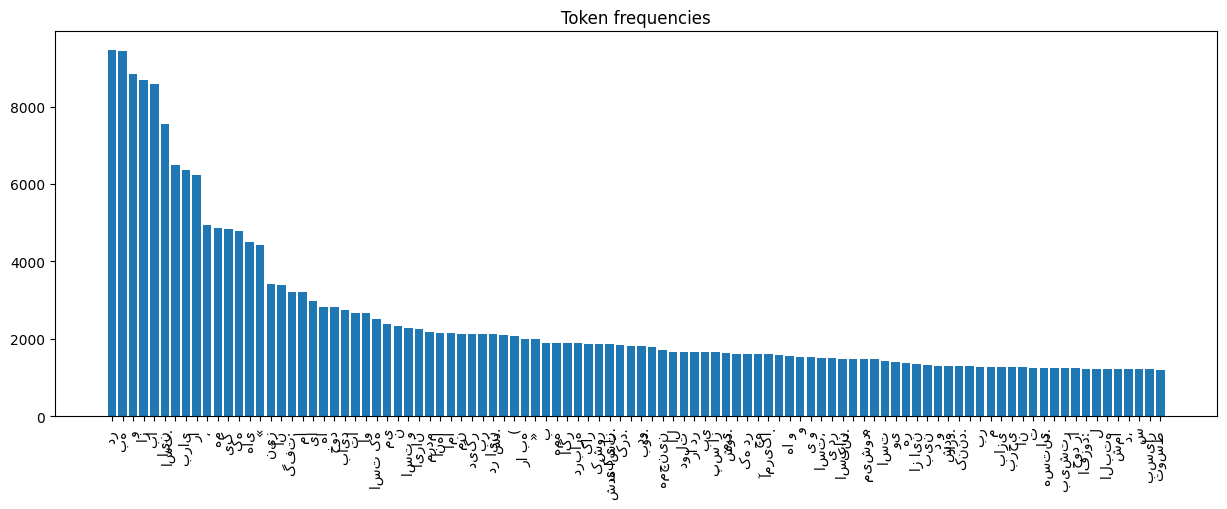

In [ ]:
import matplotlib.pyplot as plt

def plot_token_frequencies(token_frequencies, title):
    tokens, frequencies = zip(*token_frequencies.most_common(100))  # Top 100 tokens
    plt.figure(figsize=(15, 5))
    plt.bar(tokens, frequencies)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.show()

plot_token_frequencies(persian_stats_corpus[2], "Token frequencies")

In [ ]:
# without stop-words and puncuation marks
import string
from collections import Counter
import matplotlib.pyplot as plt

stopwords = [
    'به', 'از', 'را', 'و', 'برای', 'این', 'که', 'با', 'در', 'چون', 'اگر', 'ها', 'نه', 'اینکه', 'یا', 'هم', 'تا', 'که', 'آن', 'باید', 'شده', 'چرا', 'همچنین', 'کردن', 'شد', 'بر', 'کرد', 'است', 'ن', 'بر', 'می'
]


tokens_without_stopwords = [word for word in tokens if word not in stopwords]
word_counts = Counter(tokens_without_stopwords)

print("Most common words:")
most_common_words = word_counts.most_common(30)
for word, count in most_common_words:
    print(f"{word}: {count}")

Most common words:
یک: 10643
گفت: 8694
خود: 8134
وی: 6853
ایران: 6828
سال: 6687
ما: 6654
کشور: 6388
نیز: 6163
اما: 6033
دارد: 5909
شود: 5756
کرونا: 5713
بود: 5687
او: 5624
میشود: 5384
مردم: 5131
های: 5069
استان: 4957
داد: 4922
قرار: 4779
روز: 4415
کند: 4395
نها: 4371
دیگر: 4188
هزار: 4154
ادامه: 4134
هر: 4127
مریکا: 4017
کار: 3986


## Spanish B1-5

In [ ]:
word_counts = Counter(spanish_stats_corpus[2])
print("Most common words:")
most_common_words = word_counts.most_common(100)
for word, count in most_common_words:
    print(f"{word}: {count}")

Most common words:
de: 46227
,: 31649
.: 29301
la: 25630
en: 21172
el: 20155
y: 16436
a: 13116
que: 12752
los: 9923
se: 9462
del: 7689
un: 6947
su: 6672
con: 6428
por: 6306
las: 6262
una: 6188
para: 4700
es: 4234
al: 3740
como: 3600
fue: 3264
(: 2968
no: 2967
": 2670
más: 2609
lo: 2391
sus: 2256
-: 1942
o: 1838
también: 1611
este: 1397
le: 1393
entre: 1311
pero: 1276
dos: 1231
ha: 1189
esta: 1176
sin: 1153
:: 1138
son: 1097
años: 1075
): 1071
ser: 1045
sobre: 955
era: 947
desde: 939
hasta: 936
durante: 935
cuando: 908
después: 880
e: 878
año: 836
).: 821
ya: 798
está: 772
tiene: 772
parte: 764
donde: 741
«: 730
;: 714
había: 708
puede: 676
fueron: 675
primera: 659
muy: 658
gran: 649
si: 648
),: 626
uno: 617
vez: 617
s: 610
embargo: 608
cada: 596
ciudad: 584
mismo: 573
otros: 573
así: 572
tiempo: 546
".: 536
él: 531
1: 529
primer: 528
además: 527
solo: 522
aunque: 521
todo: 515
tres: 508
han: 505
ese: 501
sido: 499
2: 492
mientras: 484
estos: 482
esto: 473
todos: 465
nombre: 464
re: 458

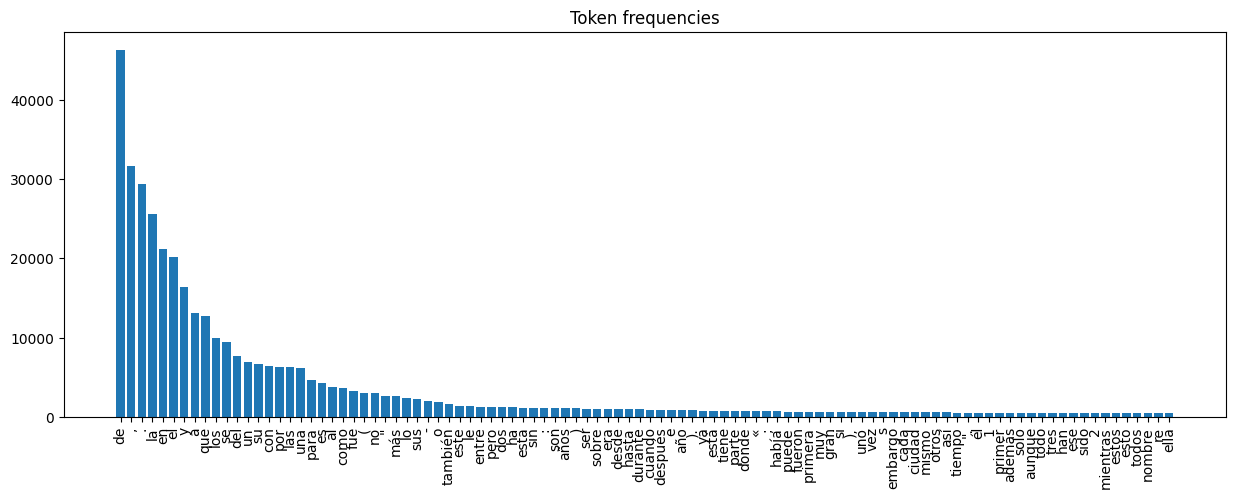

In [ ]:
import matplotlib.pyplot as plt

def plot_token_frequencies(token_frequencies, title):
    tokens, frequencies = zip(*token_frequencies.most_common(100))  # Top 30 tokens
    plt.figure(figsize=(15, 5))
    plt.bar(tokens, frequencies)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.show()

plot_token_frequencies(spanish_stats_corpus[2], "Token frequencies")

## Persian B2

- Selecting Interrogative pronouns(why, what, where, when, etc) to compare the relative frequency of members between corpora.

In [ ]:
interrogative_pronouns = ['چهکسی', 'کجا', 'چرا', 'چگونه', 'چطور', 'چه', 'زمانی', 'کسی']

In [ ]:
count_inter_pro = 0
for inter_pro in interrogative_pronouns:
    print(inter_pro," count: ", total_counter[inter_pro])
    count_inter_pro += total_counter[inter_pro]
print("Total number of Interrogative pronouns: ",count_inter_pro)

چهکسی  count:  3
کجا  count:  210
چرا  count:  1226
چگونه  count:  408
چطور  count:  243
چه  count:  2661
زمانی  count:  997
کسی  count:  1010
Total number of Interrogative pronouns:  6758


## Spanish B2

In [ ]:
inter_pro_l = ["quién", "qué","dónde","por qué","cuándo","cómo","cuál","cuánto"]

In [ ]:
count_inter_pro = 0
for inter_pro in inter_pro_l:
    print(inter_pro," count: ", total_counter[inter_pro])
    count_inter_pro += total_counter[inter_pro]
print("Total number of Interrogative pronouns: ",count_inter_pro)

quién  count:  28
qué  count:  85
dónde  count:  14
por qué  count:  0
cuándo  count:  13
cómo  count:  98
cuál  count:  15
cuánto  count:  5
Total number of Interrogative pronouns:  258


## Deliverable 4

## Persian

In [ ]:
normaliser = Sequence([StripAccents(), Lowercase()])

In [ ]:
persian_tokenizer = Tokenizer(BPE())
persian_tokenizer.normalizer = normaliser
# persian_tokenizer.pre_tokenizer = pre_tokeniser

In [ ]:
trainer = BpeTrainer(special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"], vocab_size=30000)

In [ ]:
with open(persian_text_path, "r") as f:
    train_corpus, test_corpus = train_test_split(f.readlines(), test_size=0.2)

In [ ]:
persian_tokenizer.train_from_iterator(train_corpus, trainer=trainer)

In [ ]:
def analyze_tokenizer(tokenizer, corpus):
    token_lengths = []
    tokens_per_word = []
    token_frequencies = Counter()
    sentences = 0

    for sentence in corpus:
        encoding = tokenizer.encode(sentence)
        tokens = encoding.tokens
        token_lengths.extend([len(token) for token in tokens])
        tokens_per_word.append(len(tokens) / len(sentence.split()))
        token_frequencies.update(tokens)
        sentences = sentences + 1

    avg_token_length = np.mean(token_lengths)
    avg_tokens_per_word = np.mean(tokens_per_word)

    return avg_token_length, avg_tokens_per_word, token_frequencies

with open(persian_text_path) as corpus:
    persian_stats_corpus = analyze_tokenizer(persian_tokenizer, corpus)

In [ ]:
def print_tokenization_stats(stats):
    print(f"Mean Token Length: {stats[0]:.2f}")
    print(f"Mean Tokens per Word: {stats[1]:.2f}")

print_tokenization_stats(persian_stats_corpus)

Mean Token Length: 5.76
Mean Tokens per Word: 0.94


In [ ]:
#test_corpus
print("Train Dataset: ")
train_stats = analyze_tokenizer(persian_tokenizer, train_corpus)
print_tokenization_stats(train_stats)
print("Only Test Dataset: ")
validation_stats = analyze_tokenizer(persian_tokenizer, test_corpus)
print_tokenization_stats(validation_stats)
print("Whole Dataset: ")
print_tokenization_stats(persian_stats_corpus)

Train Dataset: 
Mean Token Length: 5.78
Mean Tokens per Word: 0.93
Only Test Dataset: 
Mean Token Length: 5.69
Mean Tokens per Word: 0.95
Whole Dataset: 
Mean Token Length: 5.76
Mean Tokens per Word: 0.94


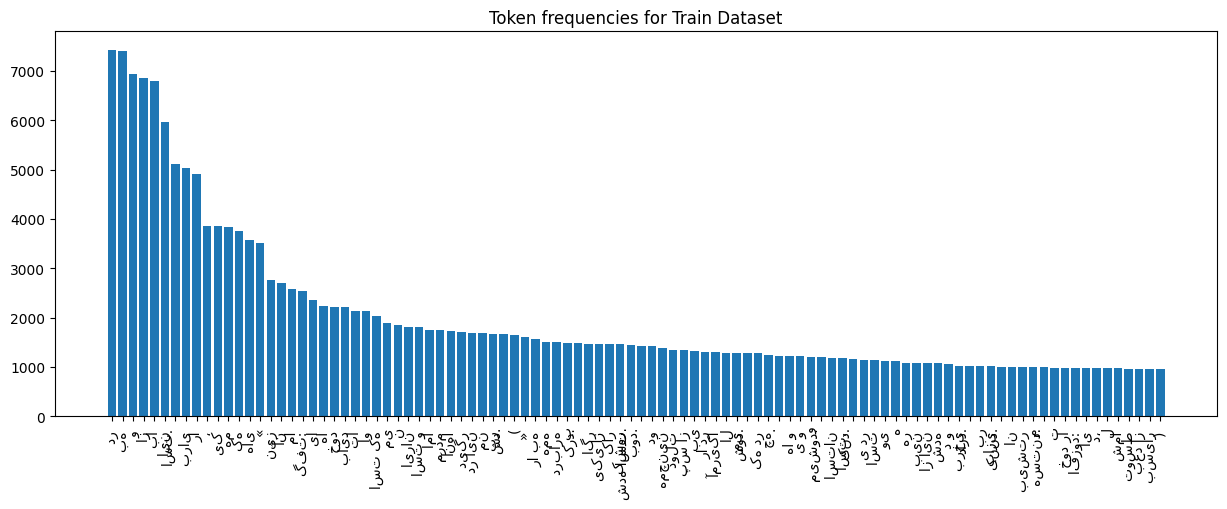

In [ ]:
plot_token_frequencies(train_stats[2], "Token frequencies for Train Dataset")

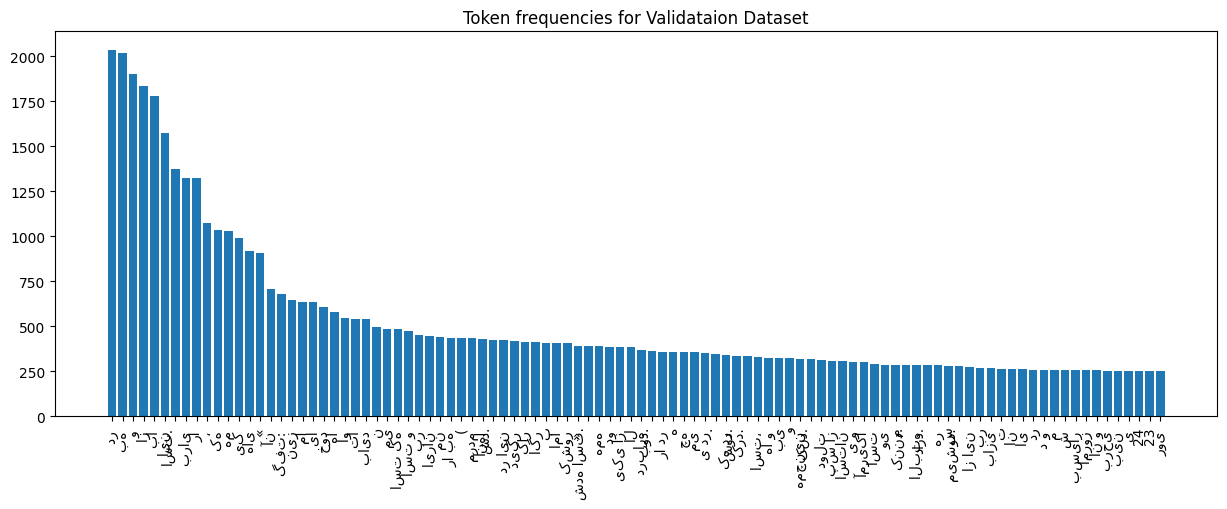

In [ ]:
plot_token_frequencies(validation_stats[2], "Token frequencies for Validataion Dataset")

In [ ]:
import random
random.seed()
def check_if_word_in(word,dataset):
    for lin in dataset:
        words = lin.split()
        if word in words:
            return True
    return False

#Search for tokens that are in the test Corpus but not in the train corpus
not_in_train_l = []
number_ex = 20
count = number_ex
lin_index = 0
while lin_index<  len(test_corpus):
    lin = test_corpus[lin_index]
    words = lin.split()
    for word in words:
        if not check_if_word_in(word,train_corpus):
            not_in_train_l.append(word)
            count -= 1
            #Just take one word from every senteces to not be biased by one obscure sentenes
            break

    if count <= 0:
        break
    lin_index += random.randint(1,40)

in_train_l = []
for x in range(number_ex):
    sent = random.choice(train_corpus)
    in_train_l.append(random.choice(sent.split()))

In [ ]:
def print_list_encoding(li):
    for word in li:
        print(persian_tokenizer.encode(word).tokens)
print("In the Validation Data but not in the train data")
print_list_encoding(not_in_train_l)
print("######")
print("In the train data")
print("######")
print_list_encoding(in_train_l)


In the Validation Data but not in the train data
['765', '13']
['490', '15']
['96', '57', '2']
['927', '25']
['68', '26']
['250', '61']
['453', '0', '5']
['33', '347']
['23', '80', '6']
['980', '94']
['19', '33', '1']
['922', '1']
['70', '34', '5']
['94', '11', '2']
['77', '20', '3']
['520', '55']
['167', '41']
['469', '84']
['37', '863']
['86', '60']
######
In the train data
######
['شد', 'ن']
['دست']
['با']
['اس', 'کی']
['میآور', 'ند', '.']
['توس', 'ط']
['را']
['میکن', 'د']
['از']
['23', '87', '1']
['از']
['وسی', 'له']
['ایران']
['43', '529']
['2', '.', '25']
['ته', 'می', 'دا', 'ت']
['اش', 'اره']
['استان']
['هم']
['توس', 'ط']


## Check the Verbs:

In [ ]:
print("1", persian_tokenizer.encode("من خوردم.").tokens)
print("2", persian_tokenizer.encode("تو می‌خوری.").tokens)
print("3", persian_tokenizer.encode("او می‌خورد.").tokens)
print("4", persian_tokenizer.encode("ما می‌خوریم.").tokens)
print("5", persian_tokenizer.encode("شما می‌خورید.").tokens)
print("6", persian_tokenizer.encode("آنها می‌خورند.").tokens)

1 ['من ', 'خور', 'دم', '.']
2 ['تو ', 'میخو', 'ری', '.']
3 ['او ', 'میخور', 'د', '.']
4 ['ما ', 'میخو', 'ری', 'م', '.']
5 ['شما ', 'میخو', 'ری', 'د', '.']
6 ['آنها ', 'میخور', 'ند', '.']


In [ ]:
print("1", persian_tokenizer.encode("کلاهت را پس می‌دهم.").tokens)
print("2", persian_tokenizer.encode("کلاهم را پس بده").tokens)
print("3", persian_tokenizer.encode("کلاهش را پس داد.").tokens)
print("4", persian_tokenizer.encode("کلاهشان را پس می‌دهیم.").tokens)
print("5", persian_tokenizer.encode("کلاهتان را پس بدهید.").tokens)
print("6", persian_tokenizer.encode("کلاهمان را پس دادند.").tokens)

1 ['کلاه', 'ت ', 'را ', 'پس ', 'می', 'دهم', '.']
2 ['کل', 'اهم ', 'را ', 'پس ', 'بده']
3 ['کلاه', 'ش را ', 'پس ', 'داد', '.']
4 ['کلاه', 'شان را ', 'پس ', 'میده', 'یم', '.']
5 ['کلاه', 'تان را ', 'پس ', 'بده', 'ید', '.']
6 ['کلاه', 'مان را ', 'پس ', 'داد', 'ند', '.']


In [ ]:
persian_word_class_analysis = analyze_word_classes(persian_tokenizer, test_word_classes)
persian_word_class_analysis

{'frequent_avg_tokens': 2.2555667793930345,
 'infrequent_avg_tokens': 2.724944320712695,
 'unseen_avg_tokens': 2.6368905448871054}

## Spanish

In [ ]:
#test_corpus
print("Train Dataset: ")
train_stats = analyze_tokenizer(spanish_tokenizer, train_corpus)
print_tokenization_stats(train_stats)
print("Only Test Dataset: ")
validation_stats = analyze_tokenizer(spanish_tokenizer, test_corpus)
print_tokenization_stats(validation_stats)
print("Whole Dataset: ")
print_tokenization_stats(spanish_stats_corpus)


Train Dataset: 
Mean Token Length: 4.13
Mean Tokens per Word: 1.23

Only Test Dataset: 
Mean Token Length: 3.99
Mean Tokens per Word: 1.27

Whole Dataset: 
Mean Token Length: 4.10
Mean Tokens per Word: 1.24



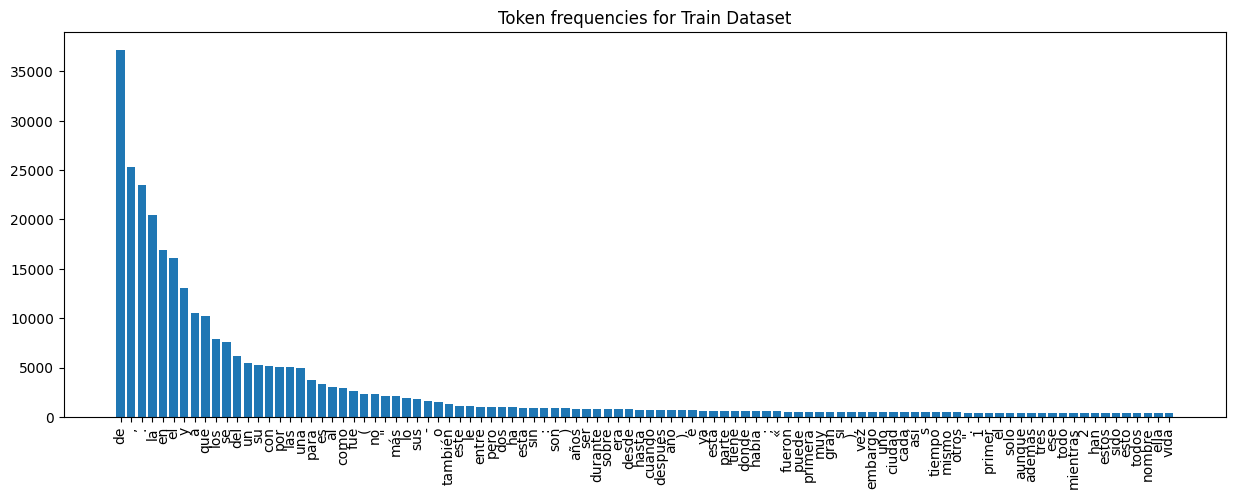

In [ ]:
plot_token_frequencies(train_stats[2], "Token frequencies for Train Dataset")

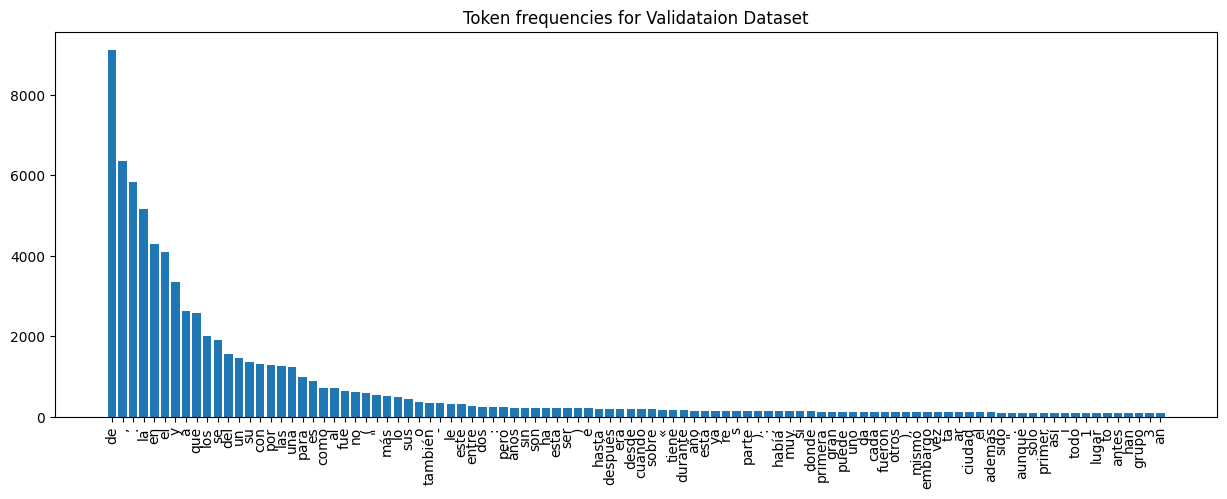

In [ ]:
plot_token_frequencies(validation_stats[2], "Token frequencies for Validataion Dataset")

## Single Word analysis


In [ ]:
import random
random.seed()
def check_if_word_in(word,dataset):
    for lin in dataset:
        words = lin.split()
        if word in words:
            return True
    return False

#Search for tokens that are in the test Corpus but not in the train corpus
not_in_train_l = []
number_ex = 20
count = number_ex
lin_index = 0
while lin_index<  len(test_corpus):
    lin = test_corpus[lin_index]
    words = lin.split()
    for word in words:
        if not check_if_word_in(word,train_corpus):
            not_in_train_l.append(word)
            count -= 1
            #Just take one word from every senteces to not be biased by one obscure sentenes
            break

    if count <= 0:
        break
    lin_index += random.randint(1,40)

in_train_l = []
for x in range(number_ex):
    sent = random.choice(train_corpus)
    in_train_l.append(random.choice(sent.split()))

In [ ]:
def print_list_encoding(li):
    for word in li:
        print(spanish_tokenizer.encode(word).tokens)
print("In the Validation Data but not in the train data")
print_list_encoding(not_in_train_l)
print("######")
print("In the train data")
print("######")
print_list_encoding(in_train_l)


In the Validation Data but not in the train data
['din', 'eros']
['gubernamental', ',']
['extra', 'ctivo']
['interpre', 'taron']
['sebastián', '".']
['s', 'w', 'apo']
['hu', 'ama', 'chu', 'co']
['gené', 'rico', ',']
['perfec', 'tos', '».']
['ofici', 'alidad']
['aya', 'to', 'lá']
['movi', 'mient', 'ista']
['venta', 'jos', 'a', '.']
['jugada', ',']
['habría', 'mos']
['urnas', '",']
['trib', 'unas']
['"', 'shelby']
['prevent', 'ivo']
['20', '%,']
######
In the train data
######
['el']
['darse']
['mientras']
['el']
['dos']
['la']
['("', 'lealtad']
['la']
['coros', '.']
['no']
['florida', '.']
['de']
['alumnos']
['consu', 'mar']
['api', 'ada']
['fue']
['son']
['en']
['resultaron']
['en']


## Check the Verbs:

I asked a friend to give me two spanish verbs in different forms to check if the ending will be seperated correctly  
The verbs are:   
yo salto, tú saltas, él/ella salta, nosotros saltamos, vosotros saltáis, ellos/ellas saltan   
yo me ducho, tú te duchas, él/ella se ducha, nosotros nos duchamos, vosotros os ducháis, ellos/ellas se duchan --> refkexiv  -> Shower

In [ ]:
#saltar, bailar, cantar, salir, correr, comer, hablar, oir, tener, aprender, obstaculizar, evitar, vacilar, beber, pretender, intentar, arrestar, fastidiar, ducharse

In [ ]:
verb1_l = ["yo salto", "tú saltas", "ella salta", "nosotros saltamos", "vosotros saltáis", "ellas saltan"]
verb2_l = ["yo me ducho", "tú te duchas", "ella se ducha", "nosotros nos duchamos", "vosotros os ducháis", "ellas se duchan"]# --> refkexiv  -> Shower

In [ ]:
print_list_encoding(verb1_l)

['yo', 'salto']
['tú', 'sal', 'tas']
['ella', 'salta']
['nosotros', 'salta', 'mos']
['vos', 'otros', 'sal', 'tá', 'is']
['ellas', 'sal', 'tan']


In [ ]:
print_list_encoding(verb2_l)

['yo', 'me', 'du', 'cho']
['tú', 'te', 'du', 'chas']
['ella', 'se', 'du', 'cha']
['nosotros', 'nos', 'du', 'cha', 'mos']
['vos', 'otros', 'os', 'du', 'chá', 'is']
['ellas', 'se', 'du', 'chan']


As seen above the verb salta gets split inconsistantly. Same goes for duchas. But with duchas there is always the start the same with "du" but the ending are getting splitted up in different ways

In [ ]:
analy = analyze_word_classes(spanish_tokenizer, test_word_classes)
analy

{'frequent_avg_tokens': 1.2366050984582506,
 'infrequent_avg_tokens': 1.8751545117428925,
 'unseen_avg_tokens': 2.5819967769165837}